# The Multi-armed bandit problem
> Implementation of epsilon greedy method on 10 arm bandit test bed

- badges: false
- categories: reinforcement-learning

The multi-arm bandit problem is a classic problem in reinforcement learning in which:

* an action is taken only in one situation (_non-associative_). 
* An agent must choose from _k_ options. 
* Each chosen action (option) gives a reward from a probability distribution specific to that option.
* The _goal_ is to maximize the expected total reward over multiple action selections (time steps).

In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
k = 10
# The average reward for each of the options. Used as mean in p.d. while choosing reward.
action_values = numpy.random.randn(k) 
print(action_values)
steps = 500
rewards = []

[ 1.35907129  1.27053183  1.57603042  0.29655815  0.790779    0.71492175
  1.27051479  0.67333983 -0.46795548  0.38030642]


In [3]:
def reward(action): # generates random reward for a specific action
    mu, var = action_values[action - 1] ,1
    return numpy.random.normal(mu, var, 1)

The value of an action (expected reward when the action is selected) is denoted by 

$ q_*(a) = \mathbb{E}[\ R_t | A_t = a\ ]$

The action values are stored in the action_values array. It is assumed that these values are not known, but can be estimated with some certainty. We use these estimates to choose actions. Such methods for estimating action values and using these values to influence actions are called action-value methods. 

One way to estimate the action value is to calculate the mean of rewards earned for that action until the current time step. The approximation 

$ Q_t(a) = \frac{\text{sum of rewards earned when action } a \text{ taken prior to }t}{\text{number of times a taken prior to }t}$ 

would converge to the action values as the number of time steps approches infinity.

In [4]:
predicted_action_values = numpy.zeros((2, k))
print(predicted_action_values)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
def update_predicted_action_values(action, reward):
    action_index = action - 1
    current_prediction = predicted_action_values[0][action_index]
    times_chosen = predicted_action_values[1][action_index]
    
    updated_prediction = (current_prediction * times_chosen + reward) / (times_chosen + 1)
    updated_times_chosen = times_chosen + 1
    
    predicted_action_values[0][action_index] = updated_prediction
    predicted_action_values[1][action_index] = updated_times_chosen

## Epsilon greedy actions

One approach to the problem is to always choose an action that maximizes $Q_t(a)$. Such greedy actions do not explore seemingly low reward actions for high rewards. Therefore, with a random probability of $\epsilon$, an action can be chosen randomly.

In [6]:
def choose_best_action(action_values):
    return numpy.argmax(action_values[0]) + 1

def choose_random_action(action_values):
    return int(numpy.where(action_values[0] == numpy.random.choice(action_values[0], 1))[0][0]) + 1

In [7]:
def choose_action(action_values, eps):
    t = [0, 1]
    choice = numpy.random.choice(t, size = 1, p = [eps, 1 - eps])
    
    if choice == 0:
        return choose_random_action(action_values)
    else:
        return choose_best_action(action_values)

In [8]:
def time_step(action_values, eps):
    chosen_action = choose_action(action_values, eps)
    current_reward = reward(chosen_action)
    update_predicted_action_values(chosen_action, current_reward)
    
    return current_reward

In [9]:
rewards = []
mean_rewards = []
approximation_error = []

for step in range(steps):
    reward_gained = time_step(predicted_action_values, eps = 0.1)
    rewards.append(reward_gained)
    mean_rewards.append(numpy.mean(rewards))
    approximation_error.append(numpy.absolute(numpy.sum(
        numpy.absolute(predicted_action_values)[0] - numpy.absolute(action_values))))

Plotting mean reward and approximation error. 

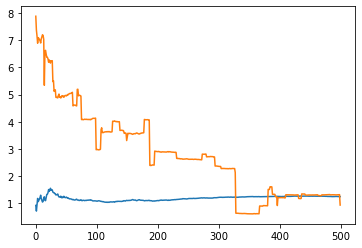

In [10]:
plt.plot(range(steps), mean_rewards)
plt.plot(range(steps), approximation_error)

In [11]:
print(numpy.max(action_values))

1.576030415965944


The average reward gained over all the time steps converges to the highest action value. As the number of steps increases, the action with the highest value is chosen everytime unless a random action is chosen.